In [20]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [21]:
def synthetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))


In [34]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
# torch.Size([1000, 1])
# print(labels.shape) 

torch.Size([1000, 1])


In [23]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.3365,  0.9147]) 
label: tensor([0.4160])


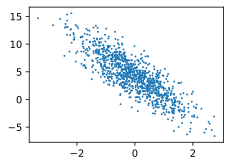

In [24]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [25]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [26]:
batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

tensor([[-0.0060, -0.5216],
        [-0.9166,  1.0380],
        [ 2.2124, -0.4458],
        [-0.0901,  0.4908],
        [ 1.0324, -0.2536],
        [ 0.4296,  0.5479],
        [-0.7635, -1.6897],
        [-0.7655, -0.4564],
        [ 0.2051, -0.5891],
        [ 0.9187,  0.7607]]) 
 tensor([[ 5.9638],
        [-1.1453],
        [10.1333],
        [ 2.3659],
        [ 7.1274],
        [ 3.1886],
        [ 8.4207],
        [ 4.1872],
        [ 6.6069],
        [ 3.4701]])


In [27]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [28]:
def linreg(x, w, b):
    return torch.matmul(x, w) + b

In [29]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [30]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [31]:
lr = 0.03
num_epochs = 3
model = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(model(x, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(model(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')
            


epoch1, loss 0.042127
epoch2, loss 0.000171
epoch3, loss 0.000049


In [32]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0004, -0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)
